Hamza Imran Mirza


In this project, I will be working with a dataset relating to diagnosis and presence of alzheimer's disease. I will visualize the data and clean the data as well i.e Data preprocessing and Data visualization.
Then I will create a Random Forest classifier to get the most important variables and then based on those variables(attributes), I will create 3 machine learning models and make predictions about the alzheimer's diagnosis. I will also evaluate the accuracy of these models and make the final prediction that which variable/attribute whose presence can be an indication of diagnosis of alzheimer's disease later in life.


In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


1. Application Domain and the Knowlege required: For this part, I will answer by stating my hypothesis.

HYPOTHESIS:  "What metric or attribute or factors can help us better predict the development of Alzheimer's disease in patients?"


The solution to the hypothesis will further be validated by creating machine learning models on said factors and correctly predicting presence or development of alzheimer's disease in patients.


Importing data and creating a dataframe.


In [ ]:
df = pd.read_csv('/content/alzheimers_disease_data.csv')
print(df.head().T)


                                    0           1           2           3  \
PatientID                        4751        4752        4753        4754   
Age                                73          89          73          74   
Gender                              0           0           0           1   
Ethnicity                           0           0           3           0   
EducationLevel                      2           0           1           1   
BMI                         22.927749   26.827681   17.795882   33.800817   
Smoking                             0           0           0           1   
AlcoholConsumption          13.297218    4.542524   19.555085   12.209266   
PhysicalActivity             6.327112    7.619885    7.844988    8.428001   
DietQuality                  1.347214    0.518767    1.826335    7.435604   
SleepQuality                 9.025679    7.151293    9.673574    8.392554   
FamilyHistoryAlzheimers             0           0           1           0   

2.1 which features are available in the dataset?
Answer: Following Features are available in the dataset:

Numerical columns:  Age, BMI, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, SystolicBP', DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, MMSE, FunctionalAssessment, ADL

Categorical columns: BehavioralProblems, CardiovascularDisease, Confusion, Depression, Diabetes, DifficultyCompletingTasks, Disorientation, EducationLevel, Ethnicity, FamilyHistoryAlzheimers, Forgetfulness, Gender, HeadInjury, Hypertension, MemoryComplaints, PersonalityChanges, Smoking

In [ ]:
#Checking for missing values, Since the output shows that no missing value is present.
#Hence we do not have to do the process of filling in missing values.
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


2.2: Since all of the columns are numerical and even categorical columns have numerical values, Hence none of the columns have a chance of having any errors or typos.

2.3: As the code above explains, ther are no null or missing values in the data set.

2.4: Solution for 2.4 is given below:

In [ ]:
#This gives us the data type of all the attributes.
df.dtypes

,0
Age,int64
Gender,int64
Ethnicity,int64
EducationLevel,int64
BMI,float64
Smoking,int64
AlcoholConsumption,float64
PhysicalActivity,float64
DietQuality,float64
SleepQuality,float64


4: I cleaned and removed the unwanted columns like PatientID and DoctorInCharge. I did not want to remove any other columns as at this point It is assumed that any of the column could be a factor that has a high impact on the outcome diagnosis. Nor I tried to create any new attributes.

In [ ]:
# Drop unnecessary columns from the DataFrame
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

# Identify numerical columns: columns with more than 10 unique values are considered numerical
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]
print(f"Numerical columns: ", numerical_columns)

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()
print(f"Categorical columns: ", categorical_columns)

Numerical columns:  ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
Categorical columns:  ['BehavioralProblems', 'CardiovascularDisease', 'Confusion', 'Depression', 'Diabetes', 'DifficultyCompletingTasks', 'Disorientation', 'EducationLevel', 'Ethnicity', 'FamilyHistoryAlzheimers', 'Forgetfulness', 'Gender', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'PersonalityChanges', 'Smoking']


In [ ]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0


4.2: Summary statistics are given below as it describes the data set and gives us mean, std, min and other valuable statistics.
The Correlation part is done later in the project.

In [ ]:
#Describes the attributes present in the data frame, Giving us mean, standard deviation, min, max etc.
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In this stage in the KDD process, I am supposed to drop the unnecessary columns and create correlations between certain attributes and make some new attributes. But I decided to not do that here. Rather, I will visualize numerical and categorical variables. Then create RF classifier to get most important attributes and create models based on those attributes.

3: Based on data visualization, one can assume that certain attributes like, Ethnicity, Age, Gender can be a major predictor of alzheimer's. But later in the project I prove otherwise.

5: Data Visualizaion

Now we will visualize all of the numerical variables with respect to diagnosis. 0 meaning alzheimer's not diagnosed and 1 meaning diagnosed with alzheimer and corresponding colors.
Also, the plot below gives the distribution of diagnosis over the range of the attribute.

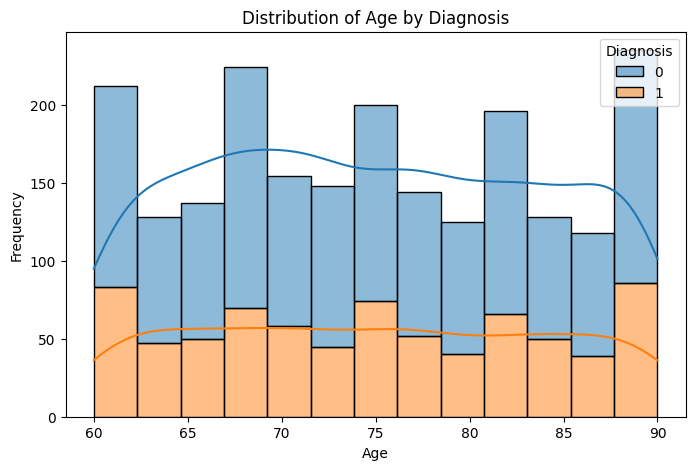

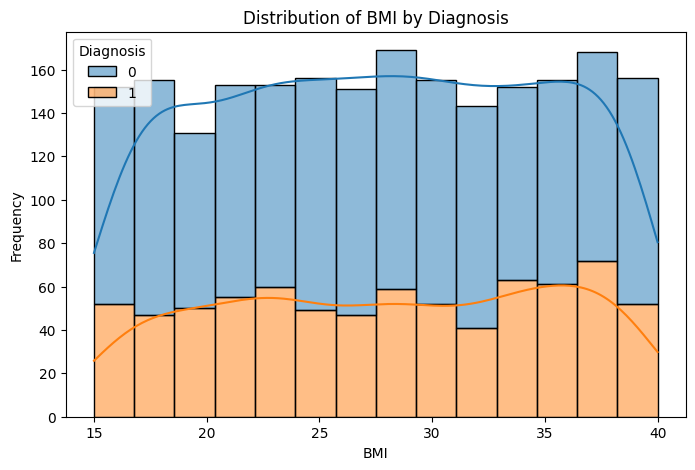

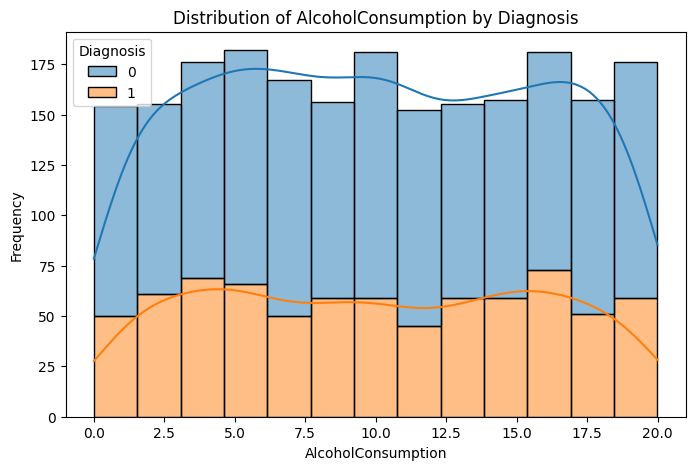

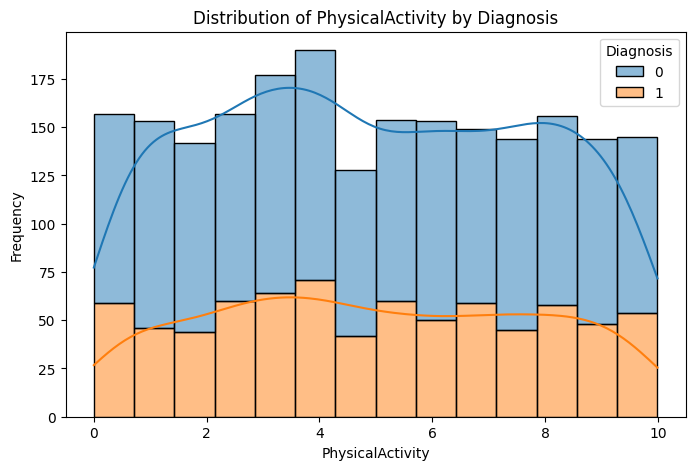

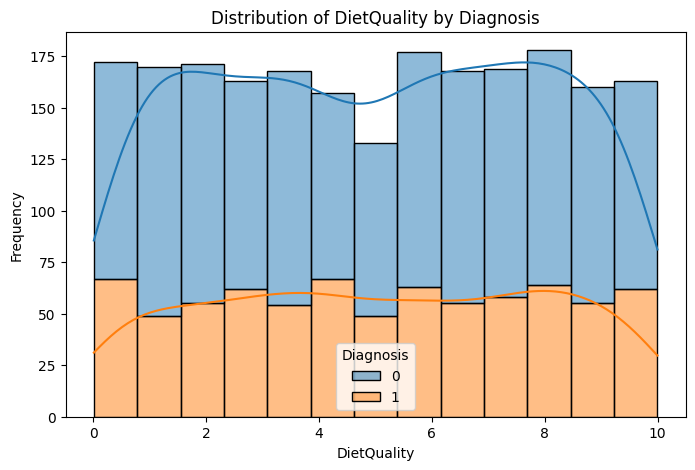

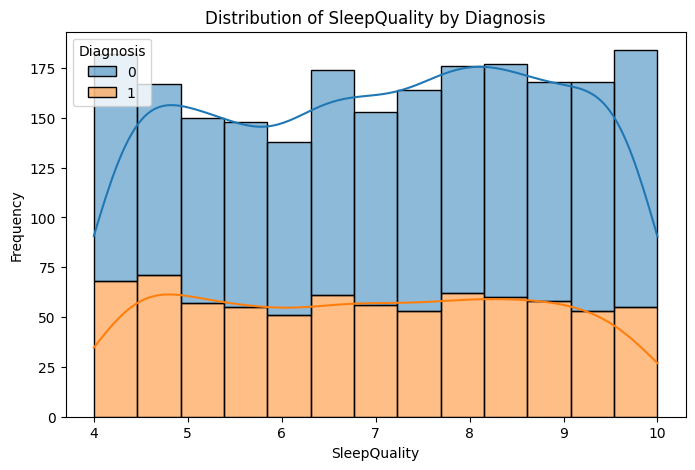

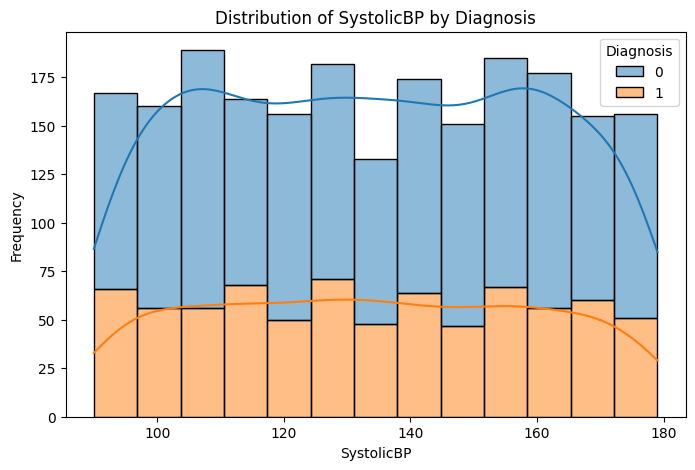

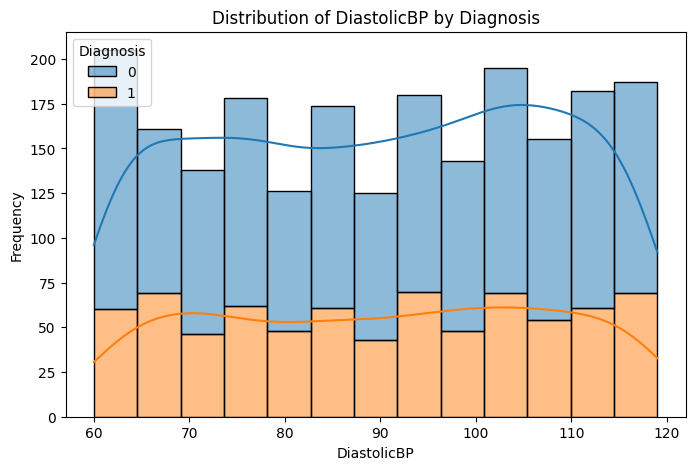

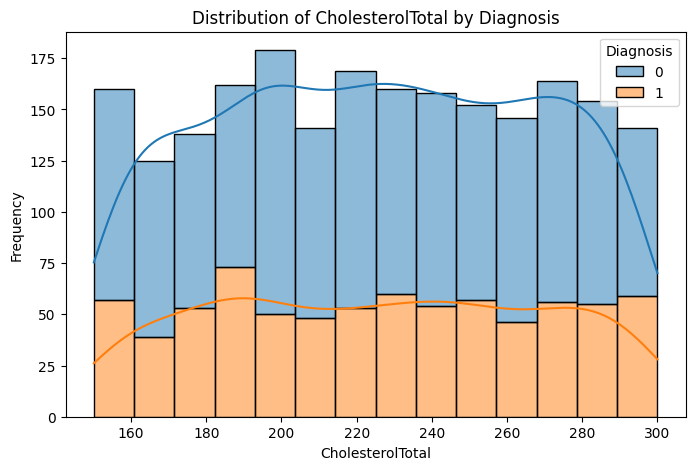

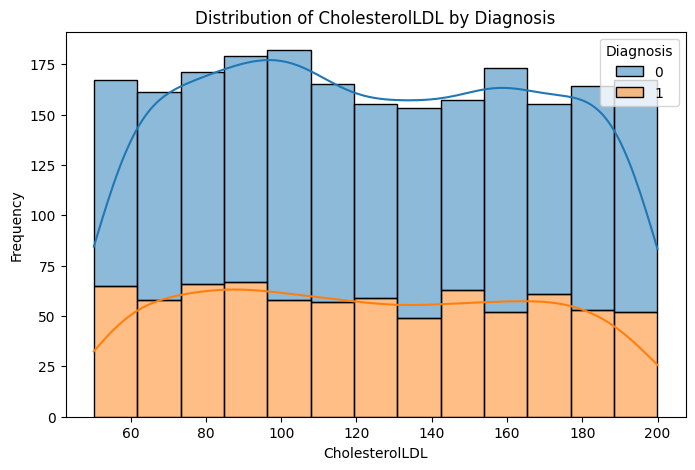

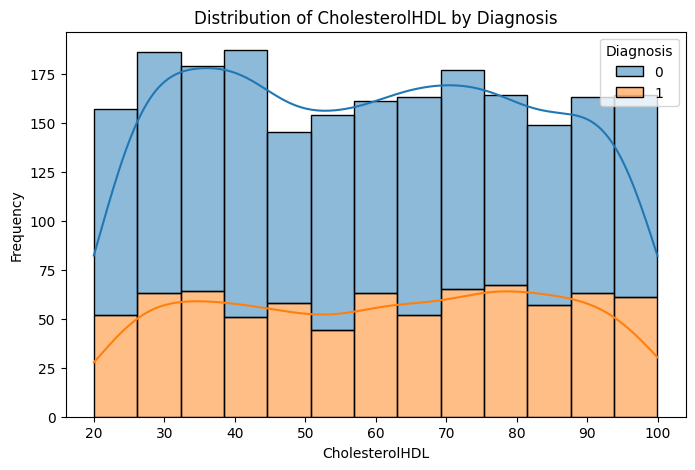

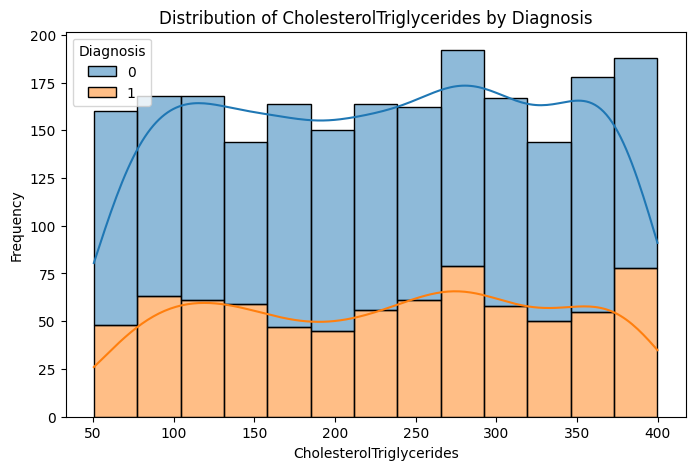

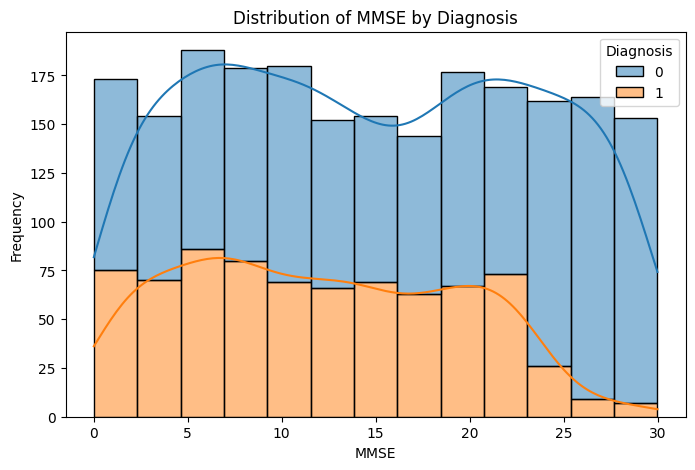

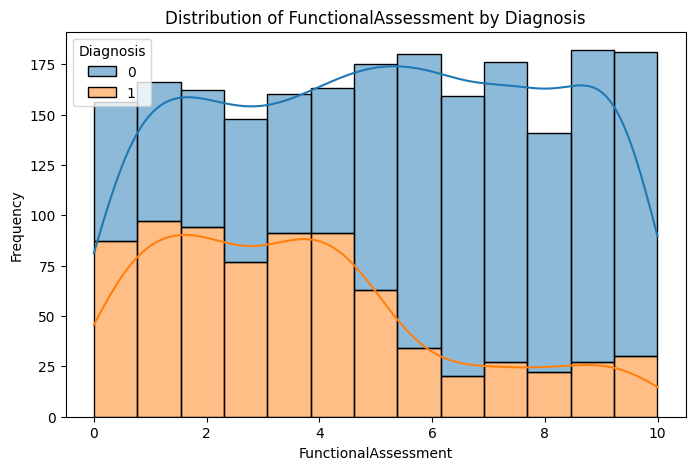

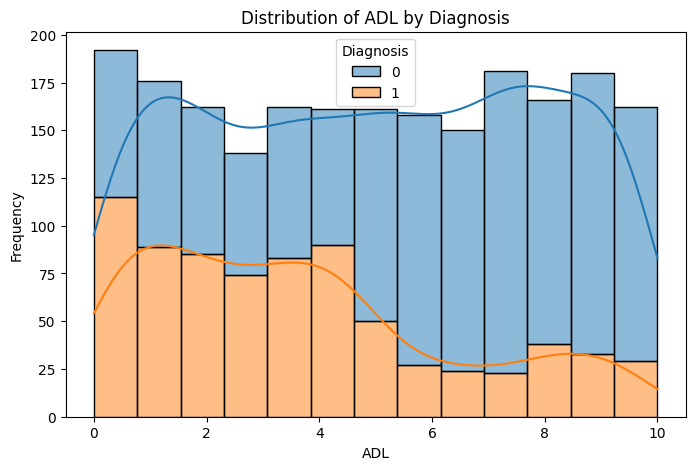

In [ ]:
# Loop through numerical columns to create histograms
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, hue='Diagnosis', kde=True, multiple="stack") # Use multiple="stack" for better visualization
    plt.title(f'Distribution of {column} by Diagnosis')
    plt.xlabel(column)  # Add x-axis label for clarity
    plt.ylabel("Frequency")  # Add y-axis label for clarity
    plt.show()

In this next step we will visualize all of the categorical variable. The plot below shows the presence and absence of the specific attribute and the diagnosis of alzheimer's according to each case of the attribute.

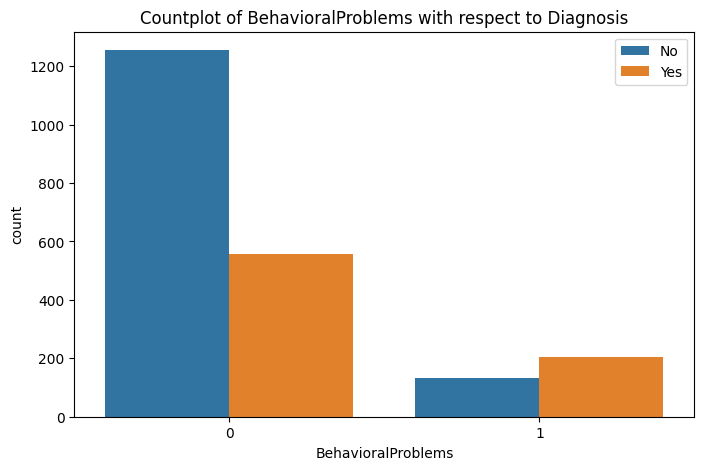

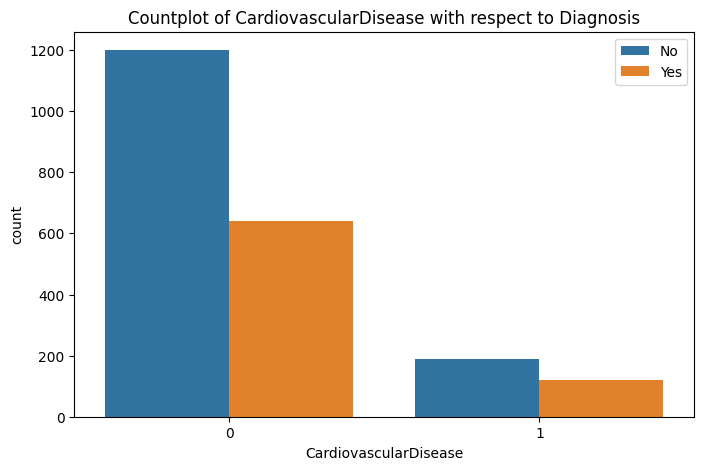

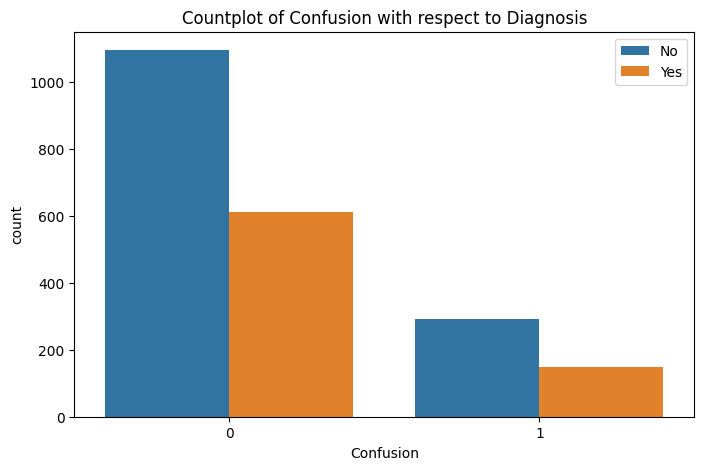

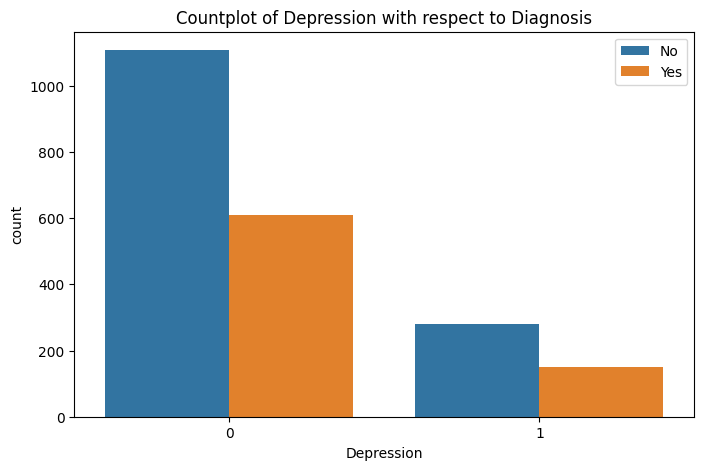

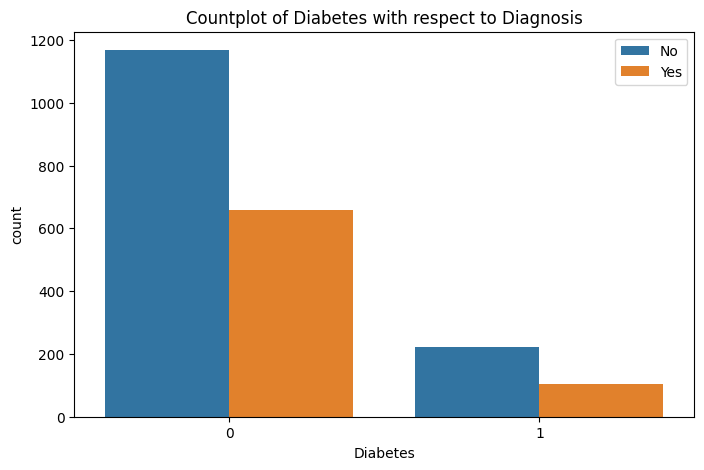

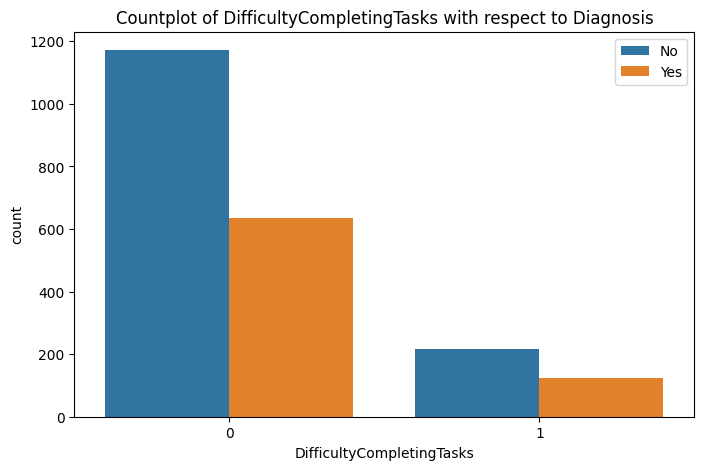

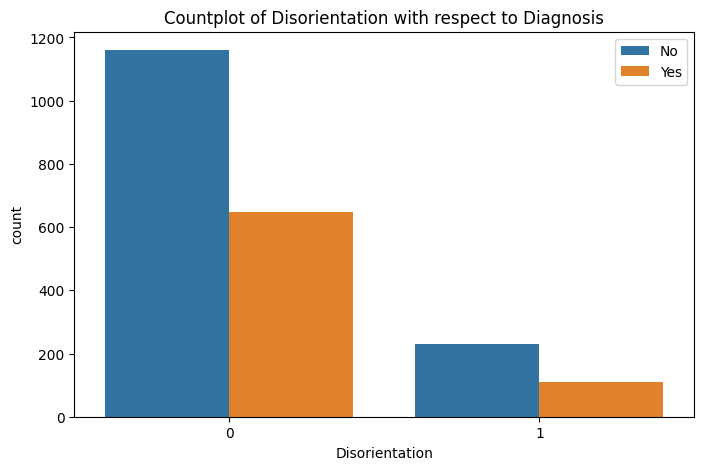

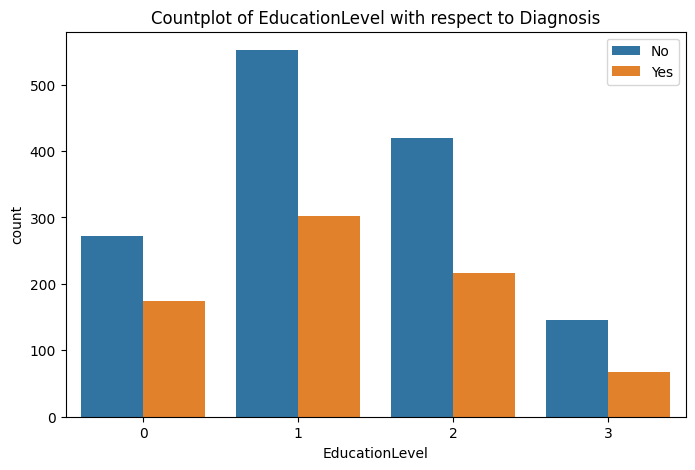

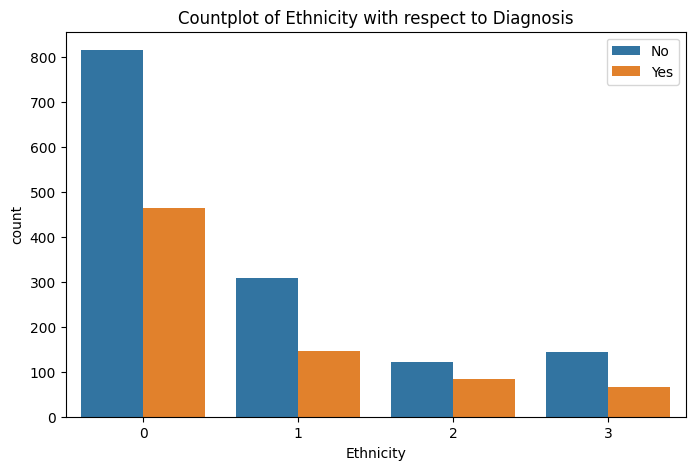

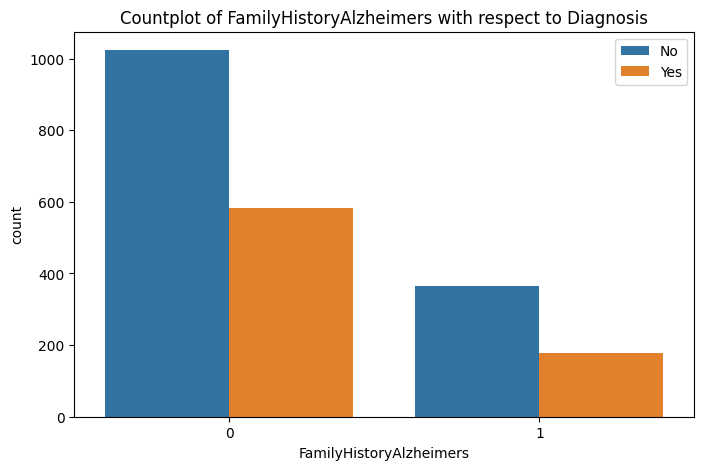

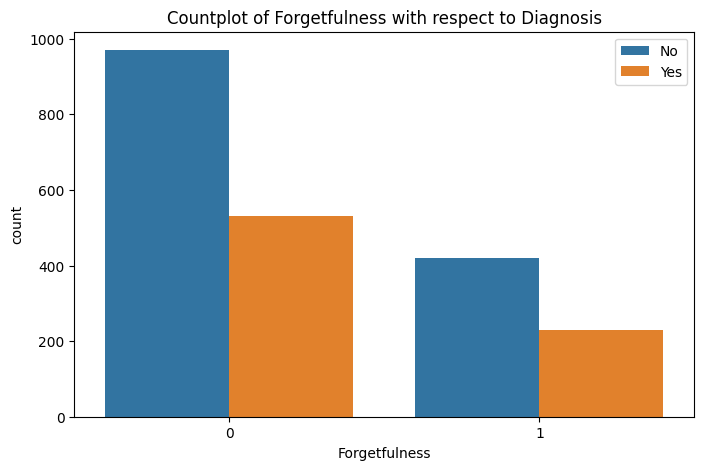

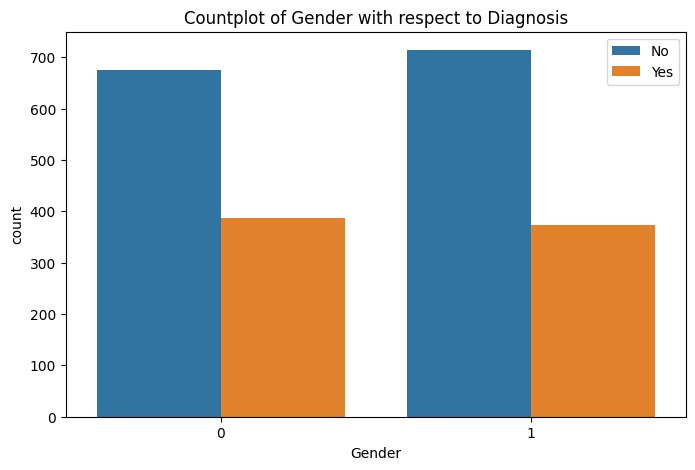

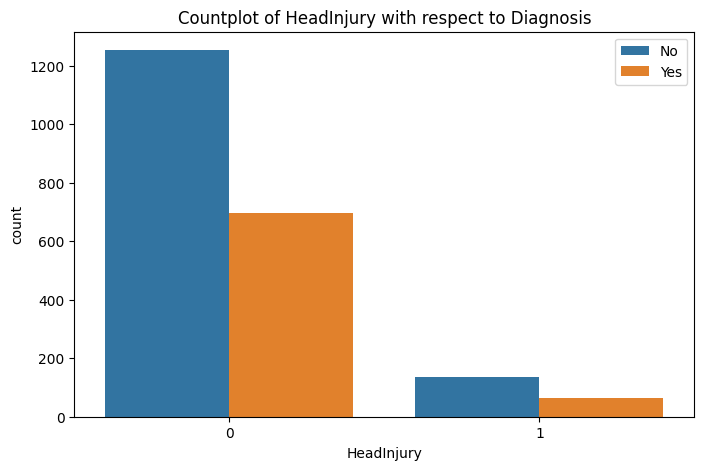

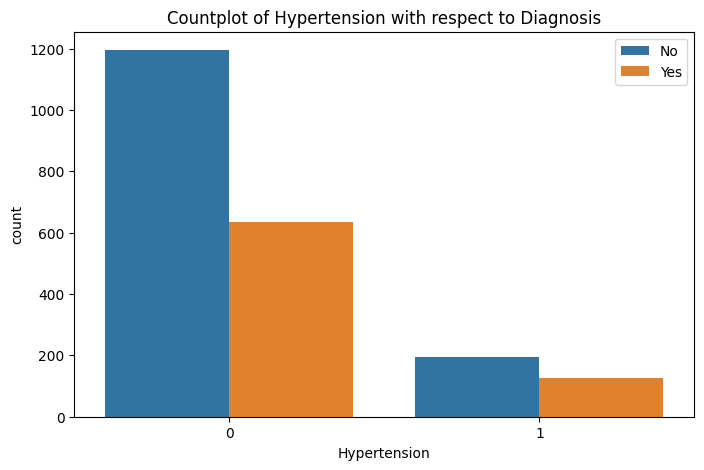

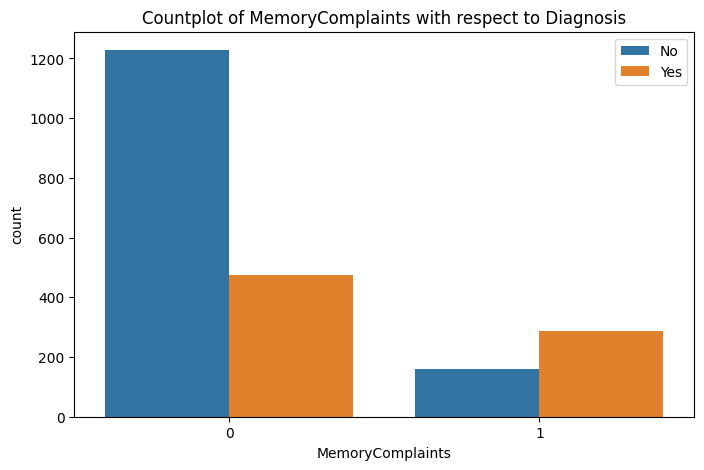

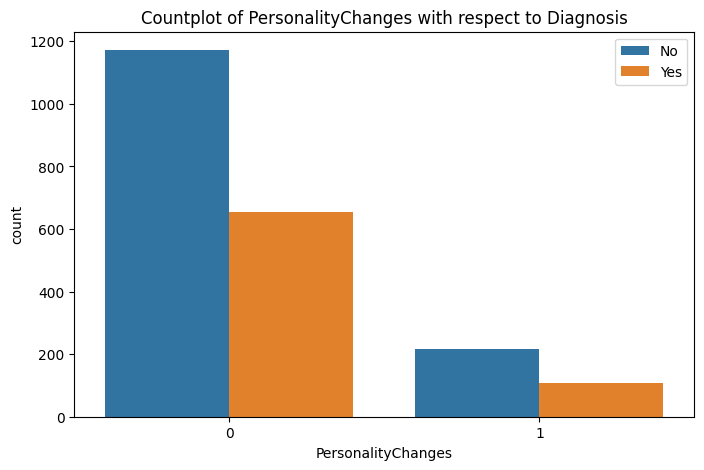

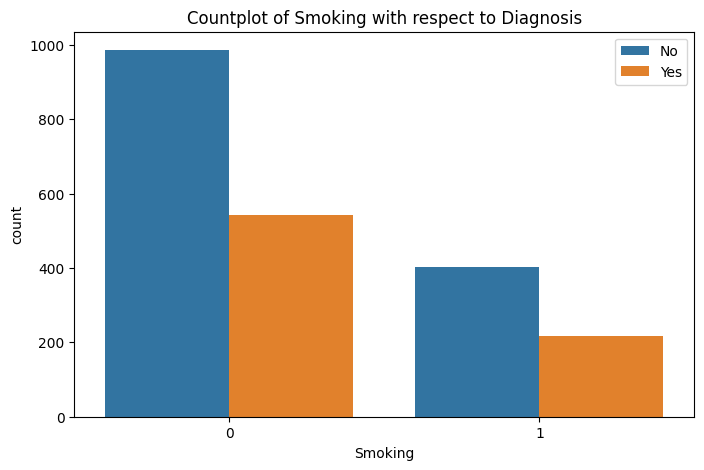

In [ ]:
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, hue='Diagnosis')
    plt.title(f'Countplot of {column} with respect to Diagnosis')

    # Replace 1 and 0 labels with 'Yes' and 'No' in the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    if labels and '1' in labels and '0' in labels:  # Check if labels exist and contain 1 and 0
        new_labels = ['Yes' if label == '1' else 'No' for label in labels]
        plt.legend(handles, new_labels)

    plt.show()

7 and 8: From this point on, I will be creating supervised machine learning models and evaluate them based on appropriate evaluation metrics. The work in this section will also overlap with data analysis and Hence, I do not have a clear seperation of classification of my work. I go through steps to prove my hypothesis.

The next step in this project is to create a Random Forest Classifier and use it to rank the attributes by their importance to the outcome (Diagnosis). In the code block below, I created a Random Forest Classifier that is iterated over 5 times with 5000 trees  and each iteration has a different split (Dyanmic Splitting). This is done with the use of Stratified K fold with dynamic random state. The attributes are then stored in rf_imp list according to their importance and the model's accuracy is calculated to be 88%.
This is done to get the most important attributes with the highest impact on the outcome and in the next step, I will use these attributes to create machine learning models to predict outcomes.

In [ ]:


# Separate features (X) and target variable (y)
x = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']


# Initialize lists to store metrics
rf_accuracy = []
rf_imp = []

# 5 iterations of cross-validation
for i in range(5):
    print('Iteration:', i + 1)

    # Stratified K-Fold with dynamic random_state
    skf = StratifiedKFold(n_splits=5, random_state=i, shuffle=True)

    # Initialize temporary list for accuracies in this iteration
    iter_accuracy = []

    for train_ix, test_ix in skf.split(x, y):
        # Splitting the data
        x_train, x_test = x.iloc[train_ix], x.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

        # Random Forest Model
        rf_md = RandomForestClassifier(n_estimators=5000, max_depth=5, random_state=42)
        rf_md.fit(x_train, y_train)

        # Predicting on the test set
        rf_pred = rf_md.predict(x_test)

        # Compute accuracy and store
        iter_accuracy.append(accuracy_score(y_test, rf_pred))

        # Store feature importances
        rf_imp.append(rf_md.feature_importances_)

    # Store the mean accuracy of this iteration
    rf_accuracy.append(np.mean(iter_accuracy))

# Final cross-validation score
rf_cv_score = np.mean(rf_accuracy)

# Print Results
print('The mean accuracy of the RF model over 5 iterations of 5-fold CV is:', rf_cv_score)


Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
The mean accuracy of the RF model over 5 iterations of 5-fold CV is: 0.8863656963191847


In the code block below, I created a new data frame that contains the mean for each feature and then filter the data frame to only contain the important features and then sort them in ascending order and plotted the data frame.

The entire reason for doing so is to get the most important features according to the RF classifier and visualize them so that we can choose those features to create our further machine learning models.


We can still support our hypothesis from this step. That the features that can better predict alzheimers are

 1. Functional Assessment, people scoring poorly on the functional assessment test (testing people's ability to perform daily functions and impairments) have a higher chance of developing alzheimers and vice versa.
 2. People with poor activities of daily living (ADL) will have higher chances of developing alzheimers and vice versa.
 3. People scoring poorly on MMSE (mini mental state examination) will have higher chances of developing alzheimers and vice versa.
 4. People with memory complaints are at higher risk of developing alzheimers.
 5. People with behavioral problems are at higher risk of developing alzheimers.

Other variables can not be neglected, But their impact on the outcome is drastically lesser than the top 5 variables and Hence I decided to not use them in making my machine learnbing models.

NOTE: For the plotting part, I took help of online sources to make the plot look better and also I refered to google to understand what would be the best way to plot the results and that is where I found to filter and sort the result.

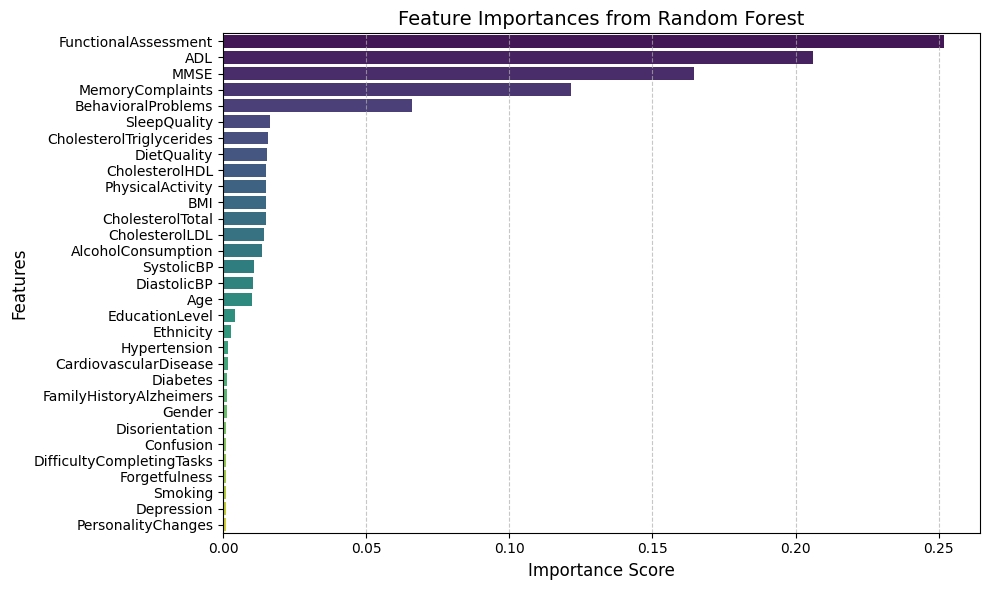

In [ ]:
# Calculate average feature importances
importance_df = pd.DataFrame({
    'Features': x.columns,
    'RF_Importance/Score': np.mean(rf_imp, axis=0)  # Directly calculate mean for each feature
})

# Filter for important features (importance > 0.0009)
importance_df = importance_df[importance_df['RF_Importance/Score'] > 0.0009]

# Sort by importance score in descending order
importance_df.sort_values(by='RF_Importance/Score', ascending=False, inplace=True)

# Reset index for cleaner display
importance_df.reset_index(drop=True, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df,
    x='RF_Importance/Score',
    y='Features',
    palette='viridis'  # Use a visually appealing color palette
)
plt.title('Feature Importances from Random Forest', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()


This step can also be considered a step of data cleaning/data mining where I only choose the most important attributes and make machine learning models based on them.

Now that we know the main factors that can impact our outcome, We can try and drop the other attributes and only work with 5 main attributes and use them to train our machine learning models and test them and evaluate their accuracy.




In [ ]:
# Create a new DataFrame with only the selected attributes
cleaned_df = df[['FunctionalAssessment','ADL','MMSE','MemoryComplaints','BehavioralProblems','Diagnosis']]
cleaned_df.head()

,FunctionalAssessment,ADL,MMSE,MemoryComplaints,BehavioralProblems,Diagnosis
0,6.518877,1.725883,21.463532,0,0,0
1,7.118696,2.592424,20.613267,0,0,0
2,5.895077,7.119548,7.356249,0,0,0
3,8.965106,6.481226,13.991127,0,1,0
4,6.045039,0.014691,13.517609,0,0,0


This step can also be considered solution for 4.2 where I give correlation between attributes using a correlation matrix. Also, It is better in my opinion to create the correlation matrix for this cleaned dataset rather than the original one with a lot of attributes.

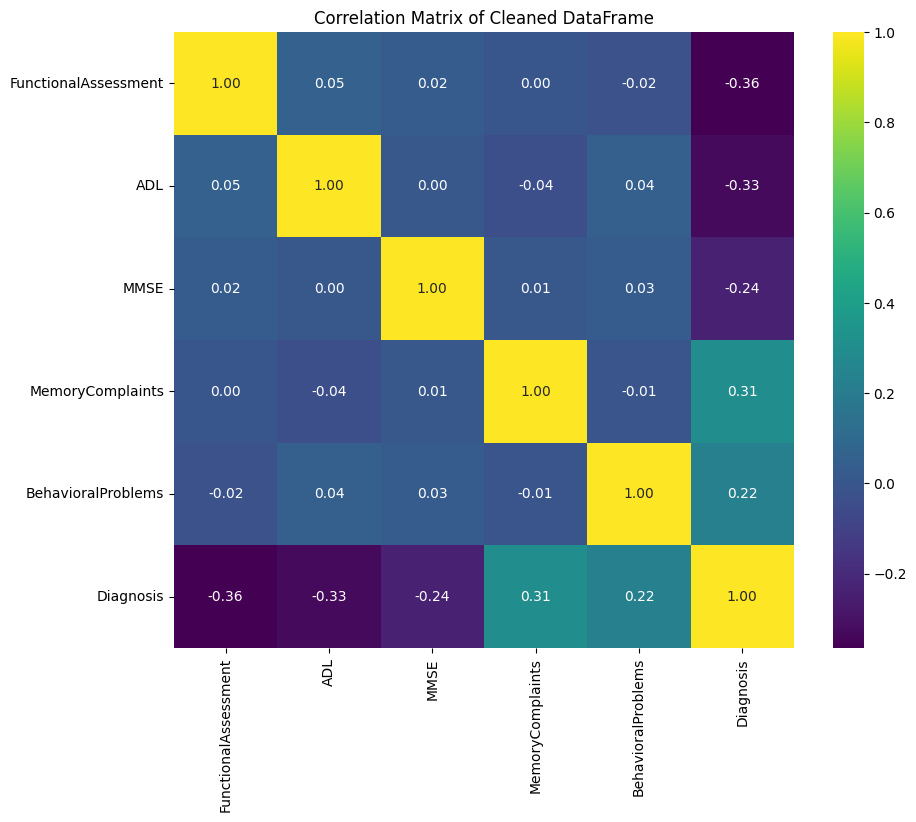

In [ ]:
# Calculate the correlation matrix
correlation_matrix = cleaned_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Cleaned DataFrame')
plt.show()



ANALYSIS:
By keeping this in mind we can see that the correlation matrix supports the findings of the RF classifier importance. We can clearly see the negative correlation between FunctionalAssessment and Diagnosis and vice versa. Same negative correlation between ADL and MMSE with Diagnosis and positive correlation of memory complaints and behavioral problems with Diagnosis.











Explanation of the Heat Map:

The correlation matrix shows the linear relationships between pairs of variables in the cleaned_df.
Values range from -1 to 1:

1 indicates a perfect positive correlation (as one variable increases, the other increases proportionally).

0 indicates no linear correlation.

-1 indicates a perfect negative correlation (as one variable increases, the other decreases proportionally).

To Analyze the correlation values in the heatmap:
We have to look for strong positive or negative correlations between the variables:


Strong positive correlations (e.g., values close to 1): indicate that the two variables tend to move in the same direction.


Strong negative correlations (e.g., values close to -1): suggest that the two variables tend to move in opposite directions.


Weak correlations (e.g., values close to 0): mean that there's no clear linear relationship between the two variables.

In [ ]:
cleaned_df.head()

,FunctionalAssessment,ADL,MMSE,MemoryComplaints,BehavioralProblems,Diagnosis
0,6.518877,1.725883,21.463532,0,0,0
1,7.118696,2.592424,20.613267,0,0,0
2,5.895077,7.119548,7.356249,0,0,0
3,8.965106,6.481226,13.991127,0,1,0
4,6.045039,0.014691,13.517609,0,0,0


Separating the features x and target variable y. Giving them descriptive names.

In [ ]:
columns = ['FunctionalAssessment', 'ADL', 'MMSE', 'MemoryComplaints', 'BehavioralProblems']
# Separate features (X) and target variable (y)
x_cln = cleaned_df.drop('Diagnosis', axis=1)
y_cln = cleaned_df['Diagnosis']


Creating a decision Tree classifier that will classify the dataset based on the clean_df and predict the outcome (Diagnosis)

In [ ]:
#Now I will create a decision tree classifier
 #save the max accuracy and size and depth at which it was achieved
max= 0 ;
size =0
depth = 0
#for loops that try different testing and depth sizes to get the highest accuracy
for i in np.arange(0.1, 1, 0.01):
  for j in range(1,8):
    #split our data using each testing size I
    xtr, xtest, ytr, ytes = train_test_split(x_cln, y_cln, test_size= i, random_state=42)
    #create the decision tree
    clt = DecisionTreeClassifier(criterion = 'entropy', max_depth=j, min_samples_split=10, min_samples_leaf=5, class_weight='balanced', random_state =42)
    #fit and predict its values then test accuracy score
    clt.fit(xtr, ytr)
    decisiontree_pred = clt.predict(xtest)
    accuracy = accuracy_score(decisiontree_pred, ytes)
    #if accuracy score is higher then we save its values
    if accuracy > max:
      max = accuracy
      size = i
      depth = j
# print to console for reference
print("Decision Tree accuracy: " ,max)
print("Test size: ", size)
print("Depth: ", depth)
#do the final split and train for the data
xtr, xtest, ytr, ytes = train_test_split(x_cln, y_cln, test_size= size, random_state=42)
clt = DecisionTreeClassifier(criterion = 'entropy', max_depth=depth)
clt.fit(xtr, ytr)
decisiontree_pred = clt.predict(xtest)

#Evaluating the decision tree classifier using F1 score
scores = cross_val_score(clt, xtr, ytr, cv=5, scoring='f1')
print("Average F1 Score:", scores.mean())



Decision Tree accuracy:  0.9622093023255814
Test size:  0.15999999999999998
Depth:  5
Average F1 Score: 0.9098933599724404


Writing the predictions made by the Decision Tree Classifier.

In [ ]:
#Printing out the predictions made by the decision tree classifier
print("Predictions", decisiontree_pred)
ones = np.count_nonzero(decisiontree_pred == 1)
zeros = np.count_nonzero(decisiontree_pred == 0)

#Printing out the number of zeros and ones
print("Number of 1s:", ones)
print("Number of 0s:", zeros)

#Printing out the percentage of people having alzheimer's and not having alzheimer's as predicted by the classifier.
print("Yes Alzheimers: ", ones/(ones+zeros)*100, "%")
print("No Alzheimers: ", zeros/(ones+zeros)*100, "%")

Predictions [0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0
 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 1 1]
Number of 1s: 123
Number of 0s: 221
Yes Alzheimers:  35.75581395348838 %
No Alzheimers:  64.24418604651163 %


Evaluation Metrics for the Decision Tree Classifiers.
Evaluating using confusion matrix.

In [ ]:
#Using confusion matrix to evaluate the model
print(confusion_matrix(ytes, decisiontree_pred))
print(classification_report(ytes, decisiontree_pred))

[[214   5]
 [  7 118]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       219
           1       0.96      0.94      0.95       125

    accuracy                           0.97       344
   macro avg       0.96      0.96      0.96       344
weighted avg       0.97      0.97      0.97       344



Evaluating using ROC AUC curve

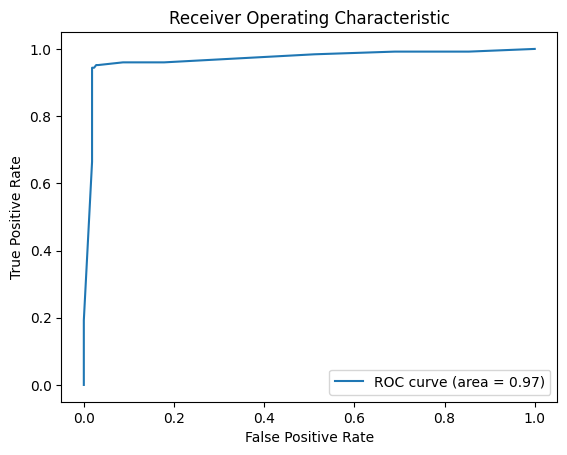

In [ ]:
#Again, using roc auc score to evaluate the model's accuracy

fpr, tpr, _ = roc_curve(ytes, clt.predict_proba(xtest)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

Printing out the decision tree

NOTE: I printed the decision in black and white, Becauase in color, the decision tree was flipping the colors of node. I wanted the node with Yes Alzheimer's to be Orange and the node with No Alzheimer's to be Blue. But it was flipped and I could not find the way to change the colors. I tried flipping the classnames, But it changes the meaning of the tree. All the diagnosed become undiagnosed and the Undiagnosed become diagnosed. Hence I left it in black and white.

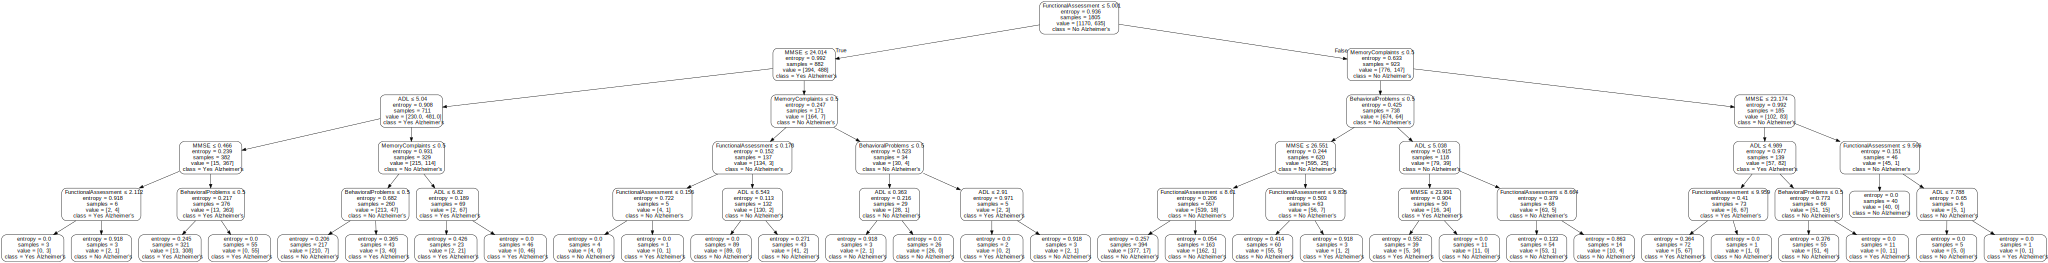

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
#visualize our data using the newest model with the highest accuracy component
dot_data = export_graphviz(clt, out_file=None,
                           feature_names=columns,
                           class_names=['No Alzheimer\'s', 'Yes Alzheimer\'s'],
                           filled=False, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph

Conclusion from the Decision Tree: The decision tree is in line with our initial findings from the RF classifier and the correlation matrices.

Creating a KNN Classifier model.

KNN Accuracy: 0.8401162790697675
KNN ROC AUC: 0.9694063926940639


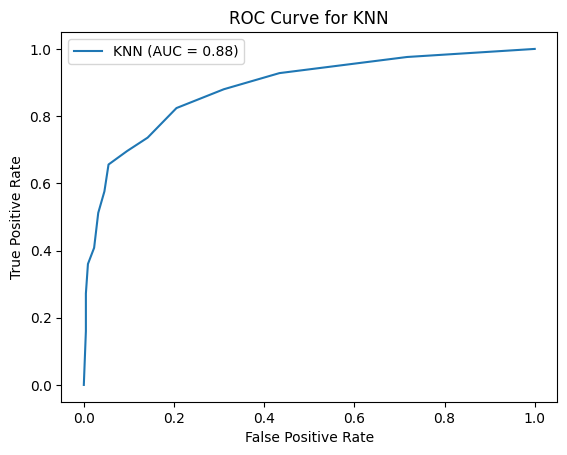

In [ ]:
#Creating the model with n value of 13, which is later found out by cross validation
knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(xtr, ytr)
knn_pred = knn_model.predict(xtest)


#prints out the KNN model's accuracy
knn_accuracy = accuracy_score(ytes, knn_pred)
print(f"KNN Accuracy: {knn_accuracy}")

# Calculating the ROC AUC score
knn_pred_proba = knn_model.predict_proba(xtest)[:, 1]
roc_auc_knn = roc_auc_score(ytes, knn_pred_proba)
print(f"KNN ROC AUC: {roc_auc}")
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(ytes, knn_pred_proba)
# Plotting the ROC curve
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.show()


In [ ]:
#The code block below will perform cross validation to find the best value of
#number of nearest neighbours for our KNN classifier for maximum accuracy

k_values = [i for i in range (1,100)]
scores = []

#use of scaler to transform the values in x_cln
scaler = StandardScaler()
scaled_x_cln = scaler.fit_transform(x_cln)
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, scaled_x_cln, y_cln, cv=5)
  scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy')

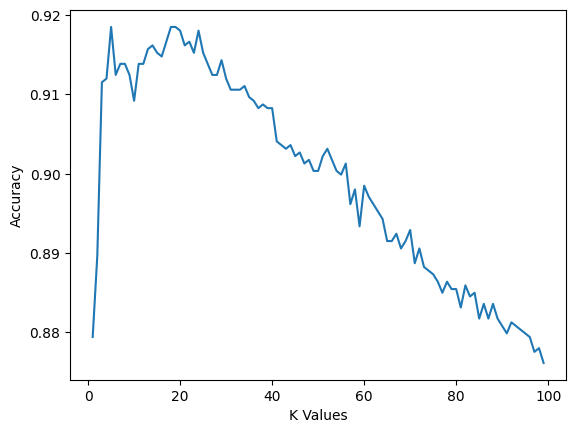

In [ ]:
#Plots the graph for accuracy against the K values
plt.figure()
plt.plot(k_values, scores)
plt.xlabel("K Values")
plt.ylabel("Accuracy")


In [ ]:
#This step is similar to that of decision tree
#Here we simply print out the predicitions made by the classifier

print("Prediction: ", knn_pred)
ones_knn = np.count_nonzero(knn_pred == 1)
zeros_knn = np.count_nonzero(knn_pred == 0)

#Print out the numbers of 1s and 0s
print("Number of 1s:", ones)
print("Number of 0s:", zeros)

#and then print out the percentage of people having alzheimers and not according to the predictions.
print("Yes Alzheimers: ", ones_knn/(ones_knn+zeros_knn)*100, "%")
print("No Alzheimers: ", zeros_knn/(ones_knn+zeros_knn)*100, "%")

Prediction:  [0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1]
Number of 1s: 94
Number of 0s: 250
Yes Alzheimers:  27.325581395348834 %
No Alzheimers:  72.67441860465115 %


CONCLUSION:
The original hypothesis was "What metric or attribute or factors can help us better predict the development of Alzheimer's disease in patients?". The answer to that original hypothesis from my findings is as follows:
Clinical Tests like Functional Assessments and MMSE and Patient's own ADL (activities of daily life), Behavioral Problems, Memory Complaints (Subjective to the patient). These 5 factors are much more effective and impactful in predicting the presence or development of Alzheimer's disease in patients. Whereas other factors like Age, Obesity, Heart Disease, Ethnicity have little effect on the outcome of Alzheimer's. Note: These factors do play an importan part development of alzheimer's but for this project I am talking about presence and better diagnosis of alzheimer's in patience based on extensive data.

The second part of the hypothesis is if these factors do have high impact and better help us in diagnosing alzheimers then surely we will be able to train highly accurate machine learning models on these factors that can predict and diagnose alzheimer's correctly. Again from my findings, I was able to create a Decision Tree Classifier model that predicted and classified the patients with 96% accuracy. and I also created a KNN classifier that is 84% accurate with 96% AUC score. It is safe to say that such attributes should be the main focus while training machine learning models to predict and diagnose alzheimers.

The model that is best suited for this with the highest accuracy is a decision Tree classifier.